In [1]:
path='c:\\pytest\\data\\eng-kor\\'

In [2]:
import pandas as pd
data=pd.read_csv(path+'eng-kor_small.txt',names=['source','target'],sep='\t',encoding='utf-8')
print('data length:',len(data))
print('data type:',type(data))
print('data shape:',data.shape)
print('data sample:\n',data.sample(5))

data length: 1000
data type: <class 'pandas.core.frame.DataFrame'>
data shape: (1000, 2)
data sample:
                   source         target
200          Bring wine.        와인 가져와.
780    Tom is fast, too.         톰도 빨라.
965  Tom hired a lawyer.  톰이 변호사를 고용했어.
540       Stop shooting.        총 그만 쏴.
726    Her hair is long.  그녀의 머리카락은 길다.


In [3]:
data

,source,target
0,Go.,가.
1,Hi.,안녕.
2,Run!,뛰어!
3,Run.,뛰어.
4,Who?,누구?
...,...,...
995,Do you like singing?,노래하는 거 좋아해요?
996,Do you like singing?,노래하는 거 좋아해?
997,Don't you like cats?,고양이를 좋아하지 않아?
998,Dreams do come true.,꿈은 이루어질 거야.


In [4]:
print('data.target length:',len(data.target))
print('data.target type:',type(data.target))
print('data.target shape:',data.target.shape)
print('data.target sample:\n',data.target.sample(5))

data.target length: 1000
data.target type: <class 'pandas.core.series.Series'>
data.target shape: (1000,)
data.target sample:
 320    계속 움직이고 있어봐.
246      계속 가고 있어봐.
373         톰이 웃었어.
275         톰이 싸웠어.
349     그 사람들이 웃었어.
Name: target, dtype: object


In [5]:
data.target_input=data.target.apply(lambda x:'\t'+x+'\n')
data.target_target=data.target.apply(lambda x:x+'\n')
print("\ndata.target_input:\n",data.target_input)
print("\ndata.target_target:\n",data.target_target)



data.target_input:
 0                 \t가.\n
1                \t안녕.\n
2                \t뛰어!\n
3                \t뛰어.\n
4                \t누구?\n
             ...        
995     \t노래하는 거 좋아해요?\n
996      \t노래하는 거 좋아해?\n
997    \t고양이를 좋아하지 않아?\n
998      \t꿈은 이루어질 거야.\n
999     \t모두 그녀를 사랑한다.\n
Name: target, Length: 1000, dtype: object

data.target_target:
 0                 가.\n
1                안녕.\n
2                뛰어!\n
3                뛰어.\n
4                누구?\n
            ...       
995     노래하는 거 좋아해요?\n
996      노래하는 거 좋아해?\n
997    고양이를 좋아하지 않아?\n
998      꿈은 이루어질 거야.\n
999     모두 그녀를 사랑한다.\n
Name: target, Length: 1000, dtype: object


c:\projects\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
c:\projects\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [6]:
print('data.target length:',len(data.target_input))
print('data.target type:',type(data.target_input))
print('data.target shape:',data.target_input.shape)
print('data.target sample:\n',data.target_input.sample(5))

data.target length: 1000
data.target type: <class 'pandas.core.series.Series'>
data.target shape: (1000,)
data.target sample:
 766       \t참 친절하구나.\n
756    \t완벽한 사람은 없어.\n
692      \t걔들이 순진했어.\n
3              \t뛰어.\n
375            \t돌아.\n
Name: target, dtype: object


In [7]:
max_src_len=data.source.apply(lambda x: len(x)).max()
print('source sentence max length: ', max_src_len)

max_tar_len=data.target_input.apply(lambda x: len(x)).max()
print('source sentence max length: ', max_tar_len)

source sentence max length:  20
source sentence max length:  21


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_source=Tokenizer(num_words=None,char_level=True,lower=False) #num words->None = open
tokenizer_source.fit_on_texts(data.source)
word_index_source=tokenizer_source.word_index
print(len(word_index_source))
print(word_index_source)

64
{' ': 1, 'e': 2, 'o': 3, '.': 4, 'a': 5, 't': 6, 'i': 7, 's': 8, 'n': 9, 'r': 10, 'l': 11, 'd': 12, 'm': 13, 'h': 14, 'y': 15, 'u': 16, 'T': 17, 'g': 18, 'I': 19, 'c': 20, 'p': 21, 'w': 22, 'k': 23, "'": 24, 'v': 25, 'b': 26, 'f': 27, '?': 28, 'S': 29, '!': 30, 'W': 31, 'H': 32, 'C': 33, 'D': 34, 'E': 35, 'K': 36, 'A': 37, 'G': 38, 'Y': 39, 'N': 40, 'x': 41, 'F': 42, 'B': 43, 'L': 44, 'M': 45, 'q': 46, ',': 47, 'P': 48, 'R': 49, 'O': 50, 'z': 51, 'J': 52, 'j': 53, 'Q': 54, '-': 55, '7': 56, ':': 57, '4': 58, '5': 59, 'U': 60, '2': 61, '0': 62, '1': 63, '3': 64}


In [9]:
tokenizer_target=Tokenizer(num_words=None,char_level=True,lower=False) #num words->None = open
tokenizer_target.fit_on_texts(data.target_input)
word_index_target=tokenizer_target.word_index
print(len(word_index_target))
# print(word_index_target)
# for i,v in enumerate(word_index_target):
#     print(v)
#     if i==10:
#         break


558


In [10]:
encoder_input=tokenizer_source.texts_to_sequences(data.source)
print(data.source[0], encoder_input[0])
print(data.source[1], encoder_input[1])
print(data.source[2], encoder_input[2])
print(data.source[3], encoder_input[3])

Go. [38, 3, 4]
Hi. [32, 7, 4]
Run! [49, 16, 9, 30]
Run. [49, 16, 9, 4]


In [11]:
decoder_input=tokenizer_target.texts_to_sequences(data.target_input)
decoder_target=tokenizer_target.texts_to_sequences(data.target_target)

print(data.target_input[0], decoder_input[0])
print(data.target_input[1], decoder_input[1])
print(data.target_input[2], decoder_input[2])

print(data.target_target[0], decoder_target[0])
print(data.target_target[1], decoder_target[1])
print(data.target_target[2], decoder_target[2])

	가.
 [2, 13, 4, 3]
	안녕.
 [2, 51, 223, 4, 3]
	뛰어!
 [2, 272, 5, 18, 3]
가.
 [13, 4, 3]
안녕.
 [51, 223, 4, 3]
뛰어!
 [272, 5, 18, 3]


In [12]:
print('data.sourcetype:', type(data.source))
print('encoder_inputtype:', type(encoder_input))
print('data.source:\n', data.source)
# print('encoder_input:\n', encoder_input)

data.sourcetype: <class 'pandas.core.series.Series'>
encoder_inputtype: <class 'list'>
data.source:
 0                       Go.
1                       Hi.
2                      Run!
3                      Run.
4                      Who?
               ...         
995    Do you like singing?
996    Do you like singing?
997    Don't you like cats?
998    Dreams do come true.
999    Everybody loves her.
Name: source, Length: 1000, dtype: object


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_input=pad_sequences(encoder_input,maxlen=max_src_len,padding='post')
decoder_input=pad_sequences(decoder_input,maxlen=max_tar_len,padding='post')
decoder_target=pad_sequences(decoder_target,maxlen=max_tar_len,padding='post')

print('\npadding result sample:\n',data.target_input[0],decoder_input[0])


padding result sample:
 	가.
 [ 2 13  4  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [14]:
encoder_input

array([[38,  3,  4, ...,  0,  0,  0],
       [32,  7,  4, ...,  0,  0,  0],
       [49, 16,  9, ...,  0,  0,  0],
       ...,
       [34,  3,  9, ...,  6,  8, 28],
       [34, 10,  2, ..., 16,  2,  4],
       [35, 25,  2, ...,  2, 10,  4]])

In [15]:
# rnn이 prepadding을 하는 이유는 문장을 다 읽고 감정분류같은 전체적인 맥락을 파악해야 하기 때문에
# 정보 소실에 민감하다. 반면 seq2seq의 인/디코더는 시작과 끝의 단어를 지정하게 되어 있어서 정보의 위치에 대해서 자유롭다.
# 하지만 문장생성에서 prepadding을 안하는 이유는 s2s의 디코더는 prepadding으로 앞이 0이라고 해도 어떻게든 단어를 채울 것이다.
# 공백을 하면 오히려 잘못된 단어가 나올 가능성이 있다. postpadding을 하면 뒤에는 \n 문장끝 tag를 달아 주기 떄문에 괜찮다.


In [16]:
print('decoder_inputlength:', len(decoder_input))
print('decoder_inputtype:', type(decoder_input))
print('decoder_inputshape:', decoder_input.shape)

decoder_inputlength: 1000
decoder_inputtype: <class 'numpy.ndarray'>
decoder_inputshape: (1000, 21)


In [17]:
from tensorflow.keras.utils import to_categorical
encoder_input=to_categorical(encoder_input, num_classes=len(word_index_source)+1)
decoder_input=to_categorical(decoder_input, num_classes=len(word_index_target)+1)
decoder_target=to_categorical(decoder_target, num_classes=len(word_index_target)+1)

In [18]:
encoder_input.shape

(1000, 20, 65)

In [19]:
import numpy as np
np.set_printoptions(threshold=np.inf)
encoder_input[0].shape

(20, 65)

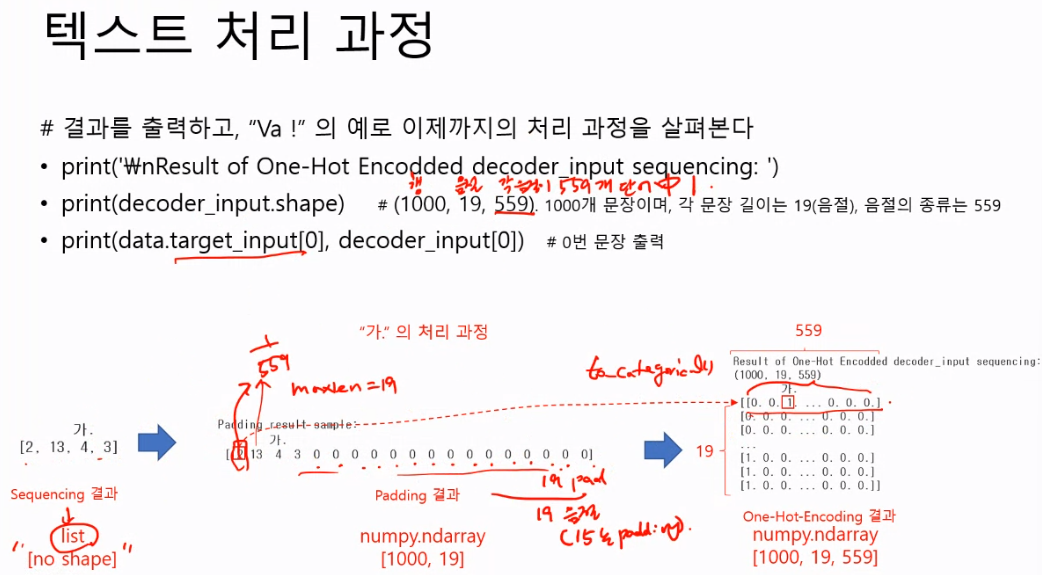

In [20]:
print('\nResultof One-Hot Encoddeddecoder_inputsequencing: ')
print(decoder_input.shape) # (1000, 19, 559). 1000개문장이며, 각문장길이는19(음절), 음절의종류는559
print(data.target_input[0], decoder_input[0])


Resultof One-Hot Encoddeddecoder_inputsequencing: 
(1000, 21, 559)
	가.
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [21]:
print('0-0\n',decoder_input[0][0])
print('\n0-1\n',decoder_input[0][1])
print('\n0-2\n',decoder_input[0][2])
print('\n0-3\n',decoder_input[0][3])
print('\n0-18\n',decoder_input[0][18])

0-0
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [162]:
# from tokenize import TokenInfo
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.utils import to_categorical

# texts=['우리 소망 꿈 통일']
# tokenizer=Tokenizer(num_words=4)
# tokenizer.fit_on_texts(texts)
# word_index=tokenizer.word_index
# data=tokenizer.texts_to_sequences(texts)
# print(word_index)
# print(data)
# print(to_categorical(data,num_classes=4))
# print(tokenizer.texts_to_matrix(texts,mode='binary'))



In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

encoder_inputs = Input(shape=(None, len(word_index_source)+1))
encoder_lstm = LSTM(units=256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]


decoder_inputs = Input(shape=(None, len(word_index_target)+1))
decoder_lstm = LSTM(units=256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(len(word_index_target)+1, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)


model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(x=[encoder_input, decoder_input], y=decoder_target, batch_size=64, epochs=10, validation_split=0.2)

encoder_model= Model(inputs=encoder_inputs, outputs=encoder_states)


Epoch 1/10
13/13 [==============================] - 2s 182ms/step - loss: 3.2666 - val_loss: 3.2297
Epoch 2/10
13/13 [==============================] - 2s 145ms/step - loss: 2.0845 - val_loss: 3.1219
Epoch 3/10
13/13 [==============================] - 2s 140ms/step - loss: 2.0258 - val_loss: 2.7068
Epoch 4/10
13/13 [==============================] - 2s 142ms/step - loss: 1.9839 - val_loss: 2.6922
Epoch 5/10
13/13 [==============================] - 2s 140ms/step - loss: 1.9477 - val_loss: 2.9537
Epoch 6/10
13/13 [==============================] - 2s 155ms/step - loss: 1.9239 - val_loss: 2.9885
Epoch 7/10
13/13 [==============================] - 2s 162ms/step - loss: 1.8802 - val_loss: 2.8683
Epoch 8/10
13/13 [==============================] - 2s 157ms/step - loss: 1.8561 - val_loss: 3.1263
Epoch 9/10
13/13 [==============================] - 2s 166ms/step - loss: 1.8091 - val_loss: 2.5887
Epoch 10/10
13/13 [==============================] - 2s 166ms/step - loss: 1.7853 - val_loss: 2.9165

In [164]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense

# encoder_inputs = Input(shape=(None, len(word_index_source)+1))
# _, state_h, state_c = LSTM(units=256, return_state=True)(encoder_inputs)
# encoder_states = [state_h, state_c]

# decoder_inputs = Input(shape=(None, len(word_index_target)+1))
# decoder_outputs, _, _ = LSTM(units=256, return_sequences=True, return_state=True)(decoder_inputs, initial_state=encoder_states)
# decoder_outputs = Dense(len(word_index_target)+1, activation='softmax')(decoder_outputs)

# model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='acc')
# model.fit([encoder_input, decoder_input], decoder_target, epochs=20, batch_size=64, validation_split=0.2)

# encoder_model= Model(inputs=encoder_inputs, outputs=encoder_states)


Epoch 1/20
13/13 [==============================] - 3s 223ms/step - loss: 3.2791 - acc: 0.5445 - val_loss: 3.1932 - val_acc: 0.4717
Epoch 2/20
13/13 [==============================] - 2s 177ms/step - loss: 2.0756 - acc: 0.6095 - val_loss: 2.8823 - val_acc: 0.4848
Epoch 3/20
13/13 [==============================] - 2s 184ms/step - loss: 2.0085 - acc: 0.6165 - val_loss: 3.0346 - val_acc: 0.4790
Epoch 4/20
13/13 [==============================] - 2s 190ms/step - loss: 1.9799 - acc: 0.6217 - val_loss: 2.7040 - val_acc: 0.5067
Epoch 5/20
13/13 [==============================] - 2s 181ms/step - loss: 1.9686 - acc: 0.6221 - val_loss: 2.9008 - val_acc: 0.4917
Epoch 6/20
13/13 [==============================] - 2s 192ms/step - loss: 1.9072 - acc: 0.6275 - val_loss: 2.9874 - val_acc: 0.4912
Epoch 7/20
13/13 [==============================] - 2s 190ms/step - loss: 1.8722 - acc: 0.6351 - val_loss: 3.3514 - val_acc: 0.4781
Epoch 8/20
13/13 [==============================] - 2s 187ms/step - loss: 1.

In [239]:
model.fit([encoder_input, decoder_input], decoder_target, epochs=200, batch_size=64, validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 182ms/step - loss: 0.0445 - val_loss: 2.8474
Epoch 2/200
13/13 [==============================] - 2s 181ms/step - loss: 0.0478 - val_loss: 2.8317
Epoch 3/200
13/13 [==============================] - 2s 180ms/step - loss: 0.0503 - val_loss: 2.8306
Epoch 4/200
13/13 [==============================] - 2s 180ms/step - loss: 0.0417 - val_loss: 2.8245
Epoch 5/200
13/13 [==============================] - 3s 193ms/step - loss: 0.0445 - val_loss: 2.8353
Epoch 6/200
13/13 [==============================] - 2s 191ms/step - loss: 0.0448 - val_loss: 2.8299
Epoch 7/200
13/13 [==============================] - 3s 238ms/step - loss: 0.0404 - val_loss: 2.8433
Epoch 8/200
13/13 [==============================] - 3s 265ms/step - loss: 0.0428 - val_loss: 2.8667
Epoch 9/200
13/13 [==============================] - 3s 203ms/step - loss: 0.0421 - val_loss: 2.8592
Epoch 10/200
13/13 [==============================] - 3s 197ms/step - loss: 0.0415 - val_lo

In [201]:
model.summary()

Model: "functional_39"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           [(None, None, 65)]   0                                            
__________________________________________________________________________________________________
input_32 (InputLayer)           [(None, None, 559)]  0                                            
__________________________________________________________________________________________________
lstm_16 (LSTM)                  [(None, 256), (None, 329728      input_31[0][0]                   
__________________________________________________________________________________________________
lstm_17 (LSTM)                  [(None, None, 256),  835584      input_32[0][0]                   
                                                                 lstm_16[0][1]        

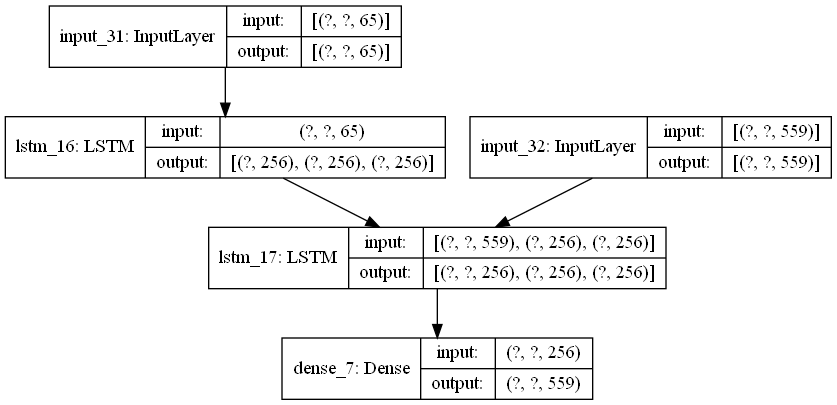

In [202]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [240]:
encoder_model= Model(inputs=encoder_inputs, outputs=encoder_states)

In [241]:
decoder_state_input_h= Input(shape=(256,))
decoder_state_input_c= Input(shape=(256,))
decoder_states_inputs= [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c= decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states= [state_h, state_c]
decoder_outputs= decoder_dense(decoder_outputs)
decoder_model= Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)

In [242]:
index_to_src= dict((i, char) for char, i in word_index_source.items())
index_to_tar= dict((i, char) for char, i in word_index_target.items())
# print(index_to_tar)

In [243]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1, len(word_index_target)+1))
    target_seq[0, 0, word_index_target['\t']] = 1.
    stop_condition = False
    decoded_sentence = ""

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens)

        if (sampled_token_index == 0):
            sampled_token_index = 1
        sampled_char = index_to_tar[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '\n' or len(decoded_sentence) > max_tar_len):
            stop_condition = True

        target_seq = np.zeros((1, 1, len(word_index_target)+1))
        target_seq[0, 0, sampled_token_index] = 1.
        states_value = [h, c]
    return decoded_sentence


In [233]:
# import numpy as np
# for seq_index in [1, 2, 3]:
#     input_seq = encoder_input[seq_index:seq_index+1]
#     decoded_sentence = decode_sequence(input_seq)
#     # print(input_seq)

#     print(35 * "-")
#     print('입력문장:', data.source[seq_index])
#     print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
#     # print('정답문장:', data.target[seq_index])
#     print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# # 10

In [234]:
# import numpy as np
# for seq_index in [1, 2, 3]:
#     input_seq = encoder_input[seq_index:seq_index+1]
#     decoded_sentence = decode_sequence(input_seq)
#     # print(input_seq)

#     print(35 * "-")
#     print('입력문장:', data.source[seq_index])
#     print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
#     # print('정답문장:', data.target[seq_index])
#     print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# # 40


In [235]:
# import numpy as np
# for seq_index in [1, 2, 3]:
#     input_seq = encoder_input[seq_index:seq_index+1]
#     decoded_sentence = decode_sequence(input_seq)
#     # print(input_seq)

#     print(35 * "-")
#     print('입력문장:', data.source[seq_index])
#     print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
#     # print('정답문장:', data.target[seq_index])
#     print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# # 70


In [221]:
# import numpy as np
# for seq_index in range(1,11):
#     input_seq = encoder_input[seq_index:seq_index+1]
#     decoded_sentence = decode_sequence(input_seq)
#     # print(input_seq)

#     print(35 * "-")
#     print('입력문장:', data.source[seq_index])
#     print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
#     # print('정답문장:', data.target[seq_index])
#     print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# # 100


-----------------------------------
입력문장: Hi.
정답문장: 안녕.
번역기가번역한문장: 안녕.
-----------------------------------
입력문장: Run!
정답문장: 뛰어!
번역기가번역한문장: 뛰어!
-----------------------------------
입력문장: Run.
정답문장: 뛰어.
번역기가번역한문장: 뛰어.
-----------------------------------
입력문장: Who?
정답문장: 누구?
번역기가번역한문장: 누구?
-----------------------------------
입력문장: Wow!
정답문장: 우와!
번역기가번역한문장: 우와!
-----------------------------------
입력문장: Fire!
정답문장: 쏴!
번역기가번역한문장: 쏴!
-----------------------------------
입력문장: Help!
정답문장: 도와줘!
번역기가번역한문장: 도와줘!
-----------------------------------
입력문장: Jump!
정답문장: 점프!
번역기가번역한문장: 점프!
-----------------------------------
입력문장: Jump.
정답문장: 점프해.
번역기가번역한문장: 점프해.
-----------------------------------
입력문장: Wait!
정답문장: 기다려!
번역기가번역한문장: 잠깐!


In [227]:
# import numpy as np
# for seq_index in range(1,21):
#     input_seq = encoder_input[seq_index:seq_index+1]
#     decoded_sentence = decode_sequence(input_seq)
#     # print(input_seq)

#     print(35 * "-")
#     print('입력문장:', data.source[seq_index])
#     print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
#     # print('정답문장:', data.target[seq_index])
#     print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# # 150


-----------------------------------
입력문장: Hi.
정답문장: 안녕.
번역기가번역한문장: 안녕.
-----------------------------------
입력문장: Run!
정답문장: 뛰어!
번역기가번역한문장: 뛰어!
-----------------------------------
입력문장: Run.
정답문장: 뛰어.
번역기가번역한문장: 뛰어.
-----------------------------------
입력문장: Who?
정답문장: 누구?
번역기가번역한문장: 누구?
-----------------------------------
입력문장: Wow!
정답문장: 우와!
번역기가번역한문장: 우와!
-----------------------------------
입력문장: Fire!
정답문장: 쏴!
번역기가번역한문장: 쏴!
-----------------------------------
입력문장: Help!
정답문장: 도와줘!
번역기가번역한문장: 도와줘!
-----------------------------------
입력문장: Jump!
정답문장: 점프!
번역기가번역한문장: 점프!
-----------------------------------
입력문장: Jump.
정답문장: 점프해.
번역기가번역한문장: 점프해.
-----------------------------------
입력문장: Wait!
정답문장: 기다려!
번역기가번역한문장: 잠깐!
-----------------------------------
입력문장: Wait!
정답문장: 잠깐!
번역기가번역한문장: 잠깐!
-----------------------------------
입력문장: Wait.
정답문장: 기다려.
번역기가번역한문장: 기다려.
-----------------------------------
입력문장: Begin.
정답문장: 시작해.
번역기가번역한문장: 시작해.
-----------------------------------
입력문장: Hello!


In [236]:
import numpy as np
for seq_index in range(1,101):
    input_seq = encoder_input[seq_index:seq_index+1]
    decoded_sentence = decode_sequence(input_seq)
    # print(input_seq)

    print(35 * "-")
    print('입력문장:', data.source[seq_index])
    print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
    # print('정답문장:', data.target[seq_index])
    print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# 200


-----------------------------------
입력문장: Hi.
정답문장: 안녕.
번역기가번역한문장: 안녕.
-----------------------------------
입력문장: Run!
정답문장: 뛰어!
번역기가번역한문장: 뛰어!
-----------------------------------
입력문장: Run.
정답문장: 뛰어.
번역기가번역한문장: 뛰어.
-----------------------------------
입력문장: Who?
정답문장: 누구?
번역기가번역한문장: 누구?
-----------------------------------
입력문장: Wow!
정답문장: 우와!
번역기가번역한문장: 우와!
-----------------------------------
입력문장: Fire!
정답문장: 쏴!
번역기가번역한문장: 쏴!
-----------------------------------
입력문장: Help!
정답문장: 도와줘!
번역기가번역한문장: 도와줘!
-----------------------------------
입력문장: Jump!
정답문장: 점프!
번역기가번역한문장: 점프!
-----------------------------------
입력문장: Jump.
정답문장: 점프해.
번역기가번역한문장: 점프해.
-----------------------------------
입력문장: Wait!
정답문장: 기다려!
번역기가번역한문장: 기다려!
-----------------------------------
입력문장: Wait!
정답문장: 잠깐!
번역기가번역한문장: 기다려!
-----------------------------------
입력문장: Wait.
정답문장: 기다려.
번역기가번역한문장: 기다려.
-----------------------------------
입력문장: Begin.
정답문장: 시작해.
번역기가번역한문장: 시작해.
-----------------------------------
입력문장: Hello

In [238]:
# import numpy as np
# for seq_index in range(500,551):
#     input_seq = encoder_input[seq_index:seq_index+1]
#     decoded_sentence = decode_sequence(input_seq)
#     # print(input_seq)

#     print(35 * "-")
#     print('입력문장:', data.source[seq_index])
#     print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
#     # print('정답문장:', data.target[seq_index])
#     print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# # 200


-----------------------------------
입력문장: He's autistic.
정답문장: 그 사람은 자폐성향이 있어.
번역기가번역한문장: 그 사람은 자폐성향이 있어.
-----------------------------------
입력문장: How beautiful!
정답문장: 이렇게나 아름다울 수가!
번역기가번역한문장: 이렇게나 아름다울 수가!
-----------------------------------
입력문장: How wonderful!
정답문장: 이렇게 멋질 수가!
번역기가번역한문장: 이렇게 멋질 수가!
-----------------------------------
입력문장: I am homesick.
정답문장: 나 향수병 걸렸어.
번역기가번역한문장: 나 향수병 걸렸어.
-----------------------------------
입력문장: I can't sleep.
정답문장: 잠이 와.
번역기가번역한문장: 잠이 와.
-----------------------------------
입력문장: I feel guilty.
정답문장: 죄책감이 들어.
번역기가번역한문장: 죄책감이 들어.
-----------------------------------
입력문장: I feel lonely.
정답문장: 외로워.
번역기가번역한문장: 외로워.
-----------------------------------
입력문장: I got engaged.
정답문장: 나 약혼했어.
번역기가번역한문장: 나 약혼했어.
-----------------------------------
입력문장: I hate myself.
정답문장: 나는 내 자신이 싫어.
번역기가번역한문장: 나는 내 자신이 싫어.
-----------------------------------
입력문장: I like horses.
정답문장: 나는 말을 좋아해.
번역기가번역한문장: 나는 말을 좋아해.
-----------------------------------
입력문장: I like win

In [244]:
import numpy as np
for seq_index in range(500,551):
    input_seq = encoder_input[seq_index:seq_index+1]
    decoded_sentence = decode_sequence(input_seq)
    # print(input_seq)

    print(35 * "-")
    print('입력문장:', data.source[seq_index])
    print('정답문장:', data.target[seq_index][:len(data.target[seq_index])])
    # print('정답문장:', data.target[seq_index])
    print('번역기가번역한문장:', decoded_sentence[:len(decoded_sentence)-1])
# 400


-----------------------------------
입력문장: He's autistic.
정답문장: 그 사람은 자폐성향이 있어.
번역기가번역한문장: 그 사람은 자폐성향이 있어.
-----------------------------------
입력문장: How beautiful!
정답문장: 이렇게나 아름다울 수가!
번역기가번역한문장: 이렇게나 아름다울 수가!
-----------------------------------
입력문장: How wonderful!
정답문장: 이렇게 멋질 수가!
번역기가번역한문장: 이렇게 멋질 수가!
-----------------------------------
입력문장: I am homesick.
정답문장: 나 향수병 걸렸어.
번역기가번역한문장: 나 향수병 걸렸어.
-----------------------------------
입력문장: I can't sleep.
정답문장: 잠이 와.
번역기가번역한문장: 잠이 와.
-----------------------------------
입력문장: I feel guilty.
정답문장: 죄책감이 들어.
번역기가번역한문장: 죄책감이 들어.
-----------------------------------
입력문장: I feel lonely.
정답문장: 외로워.
번역기가번역한문장: 외로워.
-----------------------------------
입력문장: I got engaged.
정답문장: 나 약혼했어.
번역기가번역한문장: 나 약혼했어.
-----------------------------------
입력문장: I hate myself.
정답문장: 나는 내 자신이 싫어.
번역기가번역한문장: 나는 내 자신이 싫어.
-----------------------------------
입력문장: I like horses.
정답문장: 나는 말을 좋아해.
번역기가번역한문장: 나는 말을 좋아해.
-----------------------------------
입력문장: I like win

In [247]:
input_seq_1 = tokenizer_source.texts_to_sequences([list('집에 가고 싶다.')])
input_seq_1 = pad_sequences(input_seq_1, maxlen=max_src_len, padding='post')
input_seq_1 = to_categorical(input_seq_1, num_classes=len(word_index_source)+1)

decoded_sentence= decode_sequence(input_seq_1)
print(decoded_sentence)


보여줘.

